In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## import data

In [2]:
df = pd.read_csv('./archive (1)/weather_prediction_dataset.csv')
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [3]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [5]:
df.shape

(3654, 165)

In [6]:
df.isnull().sum()

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
Length: 165, dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

In [8]:
# Focusing on sunshine data
sunshine_cols = [col for col in df.columns if 'sun' in col.lower()]
print(f"Sunshine columns: {sunshine_cols}")

Sunshine columns: ['BASEL_sunshine', 'BUDAPEST_sunshine', 'DE_BILT_sunshine', 'DRESDEN_sunshine', 'DUSSELDORF_sunshine', 'HEATHROW_sunshine', 'KASSEL_sunshine', 'LJUBLJANA_sunshine', 'MAASTRICHT_sunshine', 'MUENCHEN_sunshine', 'OSLO_sunshine', 'ROMA_sunshine', 'SONNBLICK_sunshine', 'STOCKHOLM_sunshine']


## Focusing on ROMA

In [9]:
# Extracting roma data from the dataframe
roma_df = df[[col for col in df.columns if 'ROMA' in col]]
roma_df.head()

,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_sunshine,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max
0,0,0.72,1.0244,0.92,8.4,1.6,3.0,8.0
1,2,0.74,1.0263,0.81,6.5,4.2,0.0,8.4
2,0,0.77,1.0288,0.89,0.0,3.8,11.1,21.1
3,1,0.85,1.0273,0.89,8.2,6.0,2.0,10.0
4,2,0.92,1.0238,0.74,7.5,5.0,-1.2,11.2


In [10]:
roma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ROMA_cloud_cover       3654 non-null   int64  
 1   ROMA_humidity          3654 non-null   float64
 2   ROMA_pressure          3654 non-null   float64
 3   ROMA_global_radiation  3654 non-null   float64
 4   ROMA_sunshine          3654 non-null   float64
 5   ROMA_temp_mean         3654 non-null   float64
 6   ROMA_temp_min          3654 non-null   float64
 7   ROMA_temp_max          3654 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 228.5 KB


In [11]:
roma_df.shape

(3654, 8)

In [12]:
# Moving the target value to the last column
roma_df = roma_df[[col for col in roma_df.columns if col != 'ROMA_sunshine'] + ['ROMA_sunshine']]
roma_df.head()


,ROMA_cloud_cover,ROMA_humidity,ROMA_pressure,ROMA_global_radiation,ROMA_temp_mean,ROMA_temp_min,ROMA_temp_max,ROMA_sunshine
0,0,0.72,1.0244,0.92,1.6,3.0,8.0,8.4
1,2,0.74,1.0263,0.81,4.2,0.0,8.4,6.5
2,0,0.77,1.0288,0.89,3.8,11.1,21.1,0.0
3,1,0.85,1.0273,0.89,6.0,2.0,10.0,8.2
4,2,0.92,1.0238,0.74,5.0,-1.2,11.2,7.5


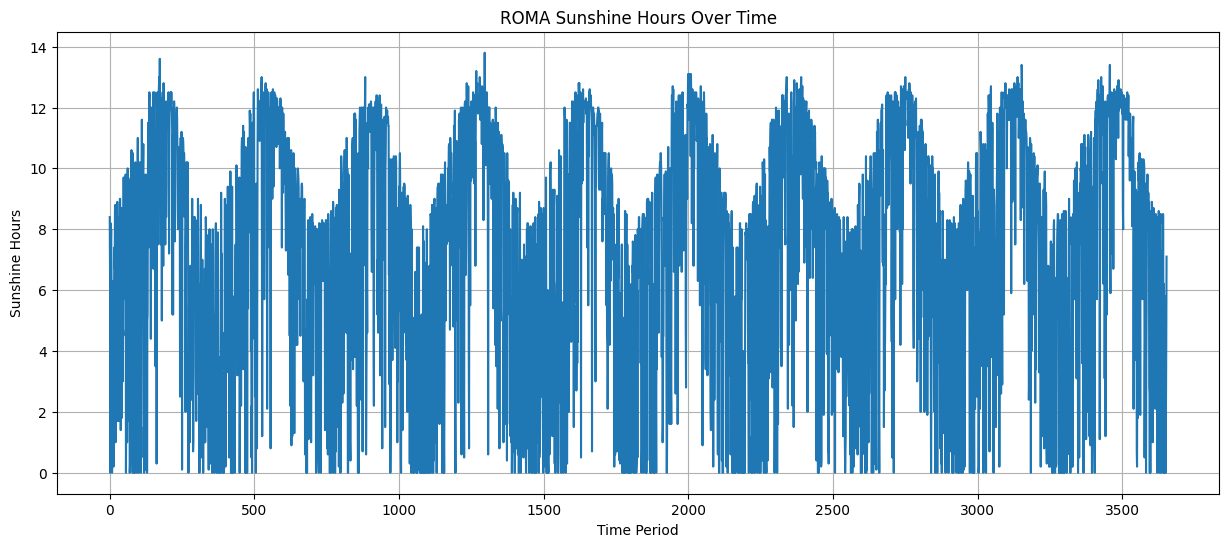

In [13]:
# Time series plot
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['ROMA_sunshine'])
plt.title('ROMA Sunshine Hours Over Time')
plt.xlabel('Time Period')
plt.ylabel('Sunshine Hours')
plt.grid(True)
plt.show()

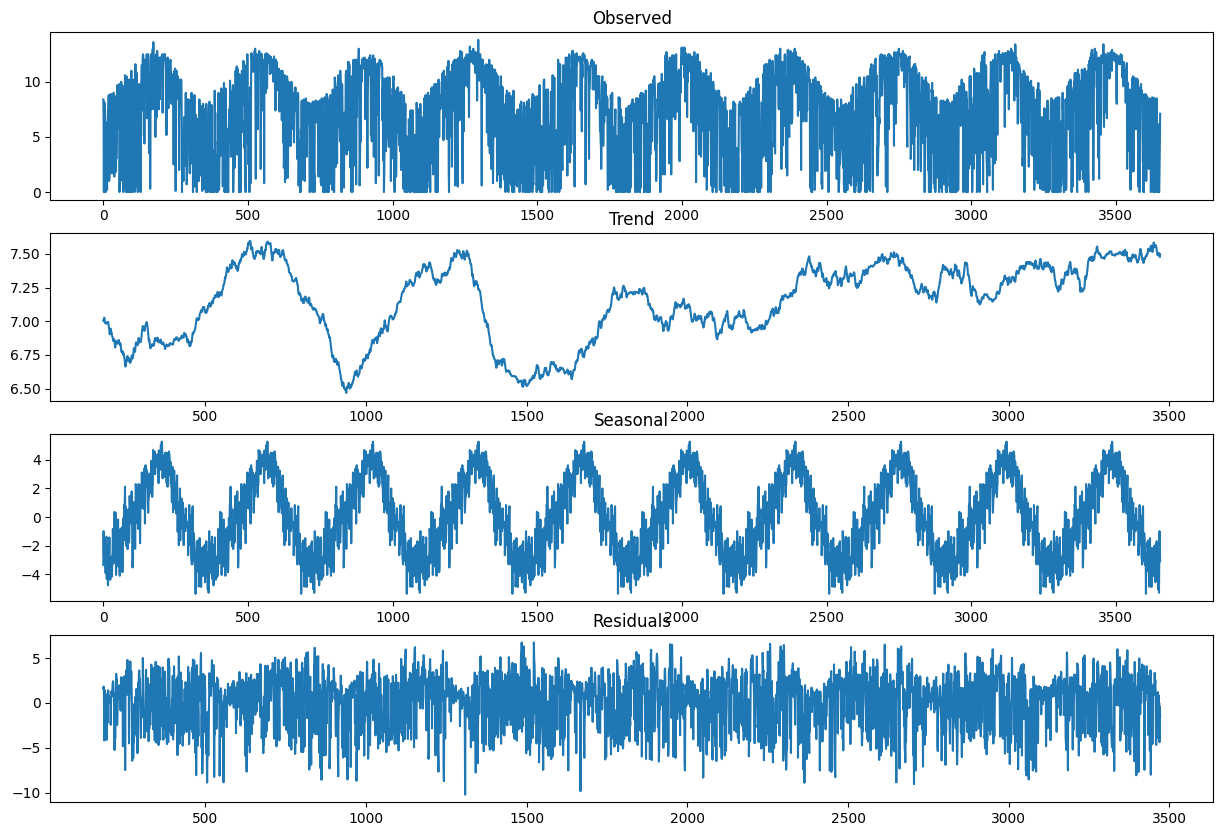

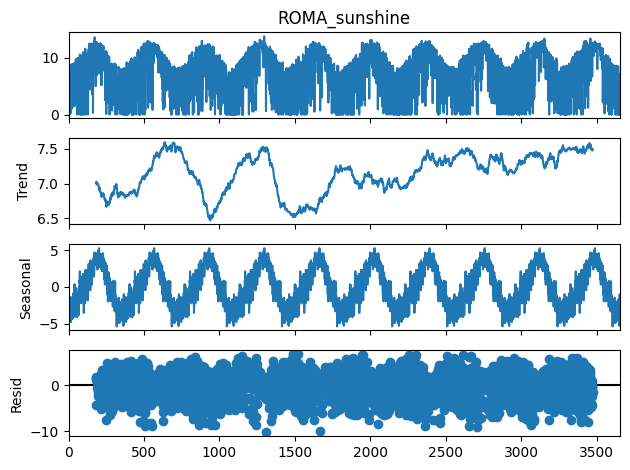

In [14]:
# Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['ROMA_sunshine'], model='additive', period=365)
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
result.observed.plot(ax=ax[0], title='Observed')
result.trend.plot(ax=ax[1], title='Trend')
result.seasonal.plot(ax=ax[2], title='Seasonal')
result.resid.plot(ax=ax[3], title='Residuals')
result.plot()
plt.show()

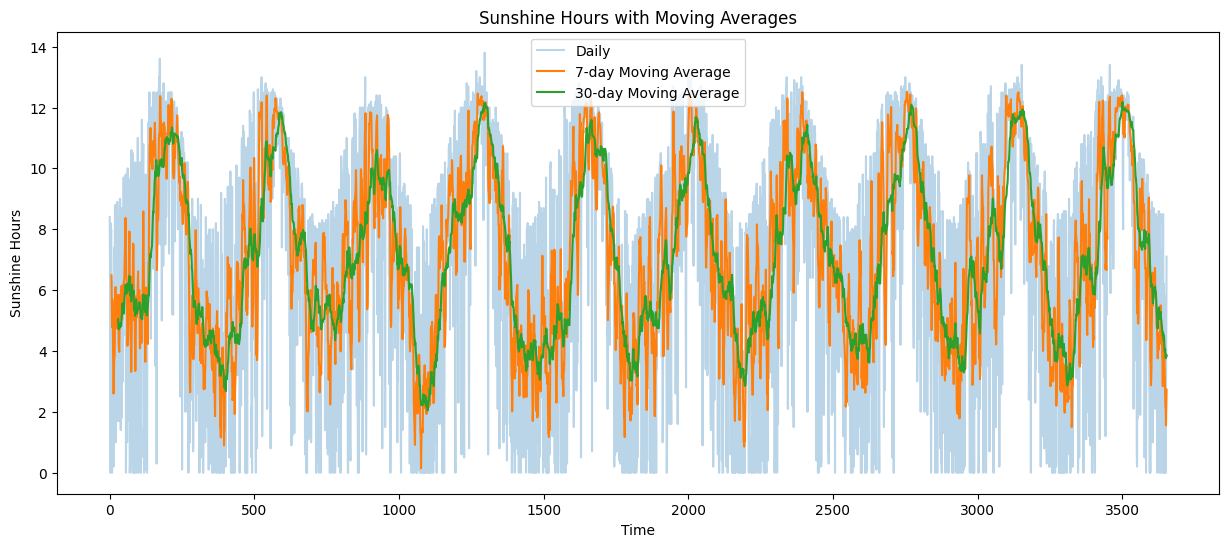

In [15]:
# Calculate moving averages
df['sunshine_7day'] = df['ROMA_sunshine'].rolling(window=7).mean()
df['sunshine_30day'] = df['ROMA_sunshine'].rolling(window=30).mean()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['ROMA_sunshine'], alpha=0.3, label='Daily')
plt.plot(df.index, df['sunshine_7day'], label='7-day Moving Average')
plt.plot(df.index, df['sunshine_30day'], label='30-day Moving Average')
plt.title('Sunshine Hours with Moving Averages')
plt.xlabel('Time')
plt.ylabel('Sunshine Hours')
plt.legend()
plt.show()

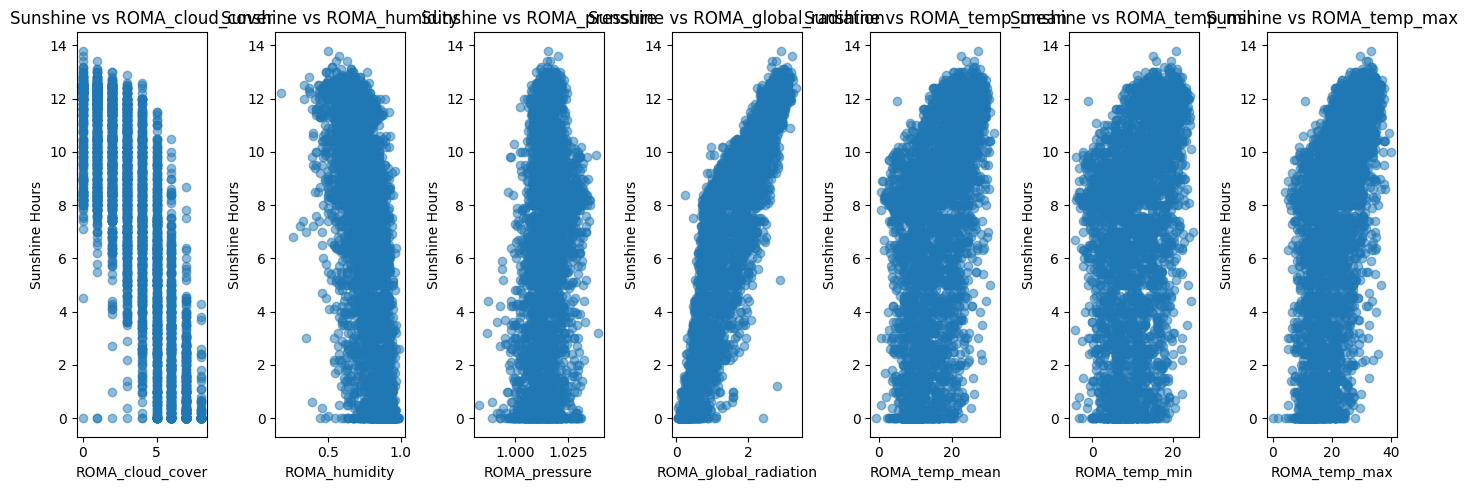

In [16]:
# Scatter plots against other weather variables
weather_vars = [df.columns[i] for i in range(len(df.columns)) if 'ROMA' in df.columns[i] and 'sunshine' not in df.columns[i]]

fig, axes = plt.subplots(1, len(weather_vars), figsize=(2 * len(weather_vars), 5))
for i, var in enumerate(weather_vars):
    if var in df.columns:
        axes[i].scatter(df[var], df['ROMA_sunshine'], alpha=0.5)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Sunshine Hours')
        axes[i].set_title(f'Sunshine vs {var}')
plt.tight_layout()
plt.show()

In [17]:
roma_df.drop(columns=['ROMA_temp_min', 'ROMA_temp_max'], inplace=True, axis=1)

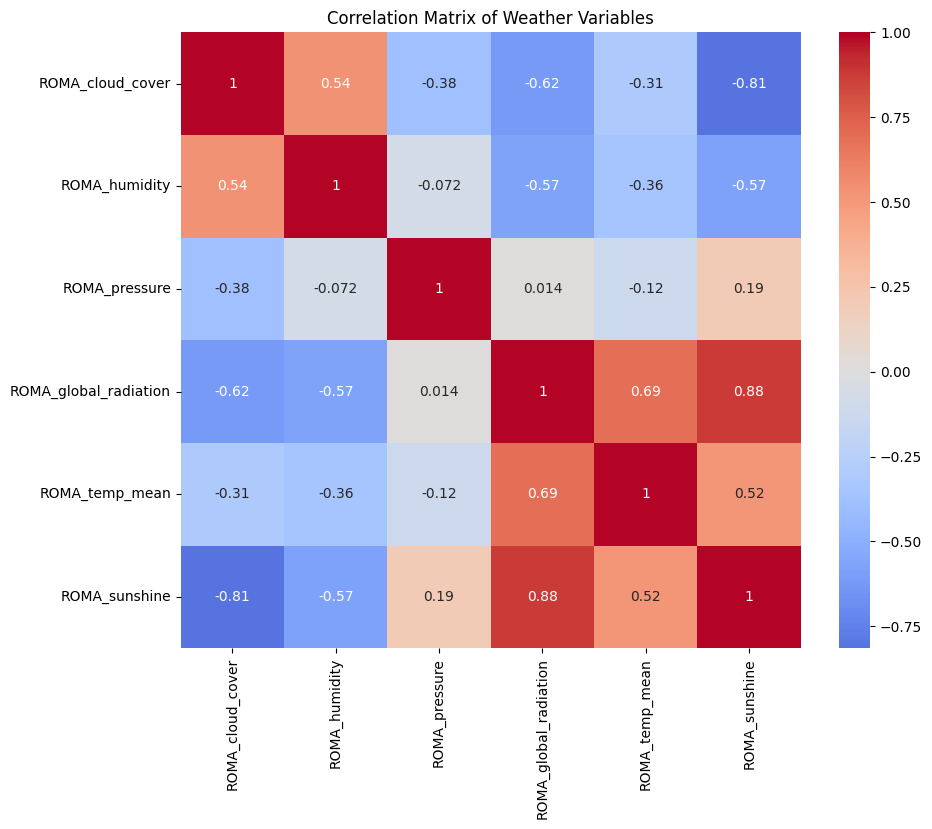

In [18]:
corr = roma_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Weather Variables')
plt.show()

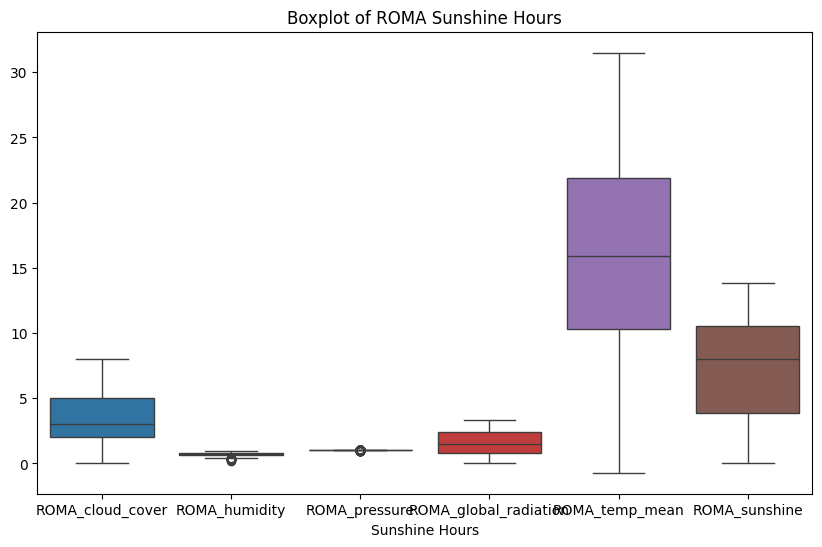

In [19]:
# Boxplot for ROMA_sunshine
plt.figure(figsize=(10, 6))
sns.boxplot(data=roma_df)
plt.title('Boxplot of ROMA Sunshine Hours')
plt.xlabel('Sunshine Hours')
plt.show()

## Training a Random Forest Regressor

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(roma_df.drop(columns=['ROMA_sunshine']), roma_df['ROMA_sunshine'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
# Training a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
# Predictions
y_pred = rf.predict(X_test_scaled)
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 1.3823452024623804
R^2 Score: 0.9139001538372612


Predictions: [1.0427e+01 1.1535e+01 1.2089e+01 1.0368e+01 4.6030e+00 5.9290e+00
 2.5900e-01 8.8810e+00 7.7840e+00 3.9110e+00 8.4900e+00 1.0359e+01
 5.3200e+00 1.9880e+00 4.0880e+00 7.0000e-01 5.6600e-01 9.1960e+00
 1.1487e+01 1.0921e+01 6.3480e+00 6.1260e+00 9.4860e+00 5.7540e+00
 8.6630e+00 6.1040e+00 6.2780e+00 7.1180e+00 6.5050e+00 2.3960e+00
 9.0310e+00 5.5690e+00 9.2260e+00 9.3100e-01 5.8640e+00 9.1700e+00
 5.0380e+00 6.9620e+00 3.1500e-01 1.0129e+01 1.7170e+00 7.8170e+00
 7.9930e+00 1.0481e+01 3.6700e-01 9.4700e-01 7.3860e+00 6.4100e+00
 7.1890e+00 9.2500e+00 1.0875e+01 6.4390e+00 8.5450e+00 4.0560e+00
 1.1741e+01 1.2486e+01 1.0334e+01 1.1767e+01 2.9460e+00 1.1779e+01
 2.0580e+00 6.6990e+00 1.1947e+01 7.5450e+00 8.7800e-01 1.2414e+01
 7.3550e+00 6.0650e+00 5.7300e+00 9.9520e+00 4.9510e+00 6.8810e+00
 1.0798e+01 1.2226e+01 2.5000e-01 6.6870e+00 1.1106e+01 7.1650e+00
 4.5000e-02 1.5810e+00 2.1860e+00 8.3680e+00 9.3620e+00 1.2061e+01
 9.6670e+00 3.7560e+00 9.4830e+00 1.0814e+01 3.77

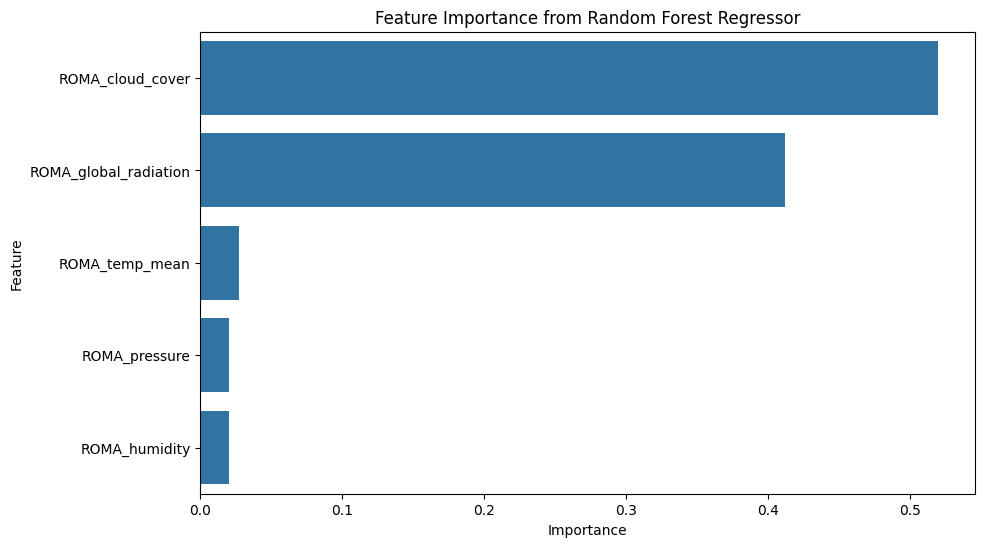

In [23]:
# Make and print predictions from the model
predictions = rf.predict(X_test_scaled)
print("Predictions:", predictions)
# Feature importance
importances = rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Regressor')
plt.show()

In [24]:
# Analyze the predictions
predictions = rf.predict(X_test_scaled)
print(f"Minimum predicted sunshine: {predictions.min():.3f} hours")
print(f"Maximum predicted sunshine: {predictions.max():.3f} hours") 
print(f"Average predicted sunshine: {predictions.mean():.3f} hours")
print(f"Standard deviation: {predictions.std():.3f} hours")

Minimum predicted sunshine: 0.003 hours
Maximum predicted sunshine: 12.820 hours
Average predicted sunshine: 7.194 hours
Standard deviation: 3.842 hours


In [25]:
# Compare predictions with actual values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions,
    'Difference': y_test - predictions
})

print("Sample comparison:")
print(comparison_df.head(10))

# Calculate accuracy metrics
mae = np.mean(np.abs(comparison_df['Difference']))
print(f"Mean Absolute Error: {mae:.3f} hours")

Sample comparison:
      Actual  Predicted  Difference
1313     9.5     10.427      -0.927
1674    11.8     11.535       0.265
229     11.8     12.089      -0.289
3509    11.8     10.368       1.432
2222     5.1      4.603       0.497
807      9.0      5.929       3.071
761      0.0      0.259      -0.259
2656     7.0      8.881      -1.881
736      7.9      7.784       0.116
2972     4.5      3.911       0.589
Mean Absolute Error: 0.823 hours


In [26]:
# Saving the Random Forest model
import joblib
joblib.dump(rf, 'rf_weather_model.pkl')
print("Random Forest model saved as 'rf_weather_model.pkl'")

Random Forest model saved as 'rf_weather_model.pkl'


## Realistic Range Check:
Very low values (0.003-1 hours): Likely cloudy/rainy days
Medium values (4-8 hours): Partly cloudy days
High values (10-12+ hours): Clear, sunny days
Maximum daylight: Should not exceed ~14-16 hours (depending on season/location)

### Business Interpretation:
## For weather forecasting:

Values near 0: Expect overcast/stormy conditions
Values 4-8: Expect partly sunny conditions
Values 10+: Expect clear, bright sunny days

## The model is predicting daily sunshine duration which is valuable for:

Solar energy planning
Agricultural decisions
Tourism planning
Weather forecasting

## Training a Support Vector Machine

In [27]:
from sklearn.svm import SVR
# Training a Support Vector Machine
svm = SVR(kernel='rbf', C=100, gamma='auto')
svm.fit(X_train_scaled, y_train)
# Make predictions with the SVM model
svm_predictions = svm.predict(X_test_scaled)
# Evaluate the SVM model
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM Mean Squared Error: {svm_mse}")
print(f"SVM R^2 Score: {svm_r2}")
# Analyze the SVM predictions
print(f"Minimum SVM predicted sunshine: {svm_predictions.min():.3f} hours")
print(f"Maximum SVM predicted sunshine: {svm_predictions.max():.3f} hours")
print(f"Average SVM predicted sunshine: {svm_predictions.mean():.3f} hours")
print(f"Standard deviation of SVM predictions: {svm_predictions.std():.3f} hours")

SVM Mean Squared Error: 1.2904597082303466
SVM R^2 Score: 0.9196232734342134
Minimum SVM predicted sunshine: -1.452 hours
Maximum SVM predicted sunshine: 12.636 hours
Average SVM predicted sunshine: 7.262 hours
Standard deviation of SVM predictions: 3.971 hours


## saving svm model

In [28]:
# Save the SVM Model
import joblib
joblib.dump(svm, 'svm_weather_model.pkl')
print("SVM model saved as 'svm_weather_model.pkl'")

SVM model saved as 'svm_weather_model.pkl'


## Time Series prediction using Prophet

In [29]:
from prophet import Prophet
# Prepare data for Prophet - create proper date column
prophet_df = df.copy()  # Use original df, not roma_df
prophet_df = prophet_df.reset_index()

# Create proper date column (assuming your data has daily frequency)
prophet_df['ds'] = pd.date_range(start='2020-01-01', periods=len(prophet_df), freq='D')
prophet_df = prophet_df[['ds', 'ROMA_sunshine']].rename(columns={'ROMA_sunshine': 'y'})

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)

c:\Users\Achilles\Desktop\Resources\Projects\AI&ML\AI-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
18:52:48 - cmdstanpy - INFO - Chain [1] start processing
18:52:49 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
%pip install plotly
%pip install --upgrade nbformat>=4.2.0

import plotly.graph_objects as go

# Create interactive plot
dates = pd.date_range(start='2020-01-01', periods=len(df), freq='D')

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=dates,
    y=df['ROMA_sunshine'],
    mode='lines',
    name='Sunshine Hours',
    line=dict(color='steelblue', width=1),
    hovertemplate='<b>Date:</b> %{x}<br><b>Sunshine:</b> %{y:.2f} hours<extra></extra>'
))

fig.update_layout(
    title='Interactive ROMA Sunshine Hours Time Series',
    xaxis_title='Date',
    yaxis_title='Sunshine Hours',
    hovermode='x unified',
    width=1000,
    height=500
)

fig.show(renderer='browser')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Realistic Range Check:
Very low values (0.003-1 hours): Likely cloudy/rainy days
Medium values (4-8 hours): Partly cloudy days
High values (10-12+ hours): Clear, sunny days


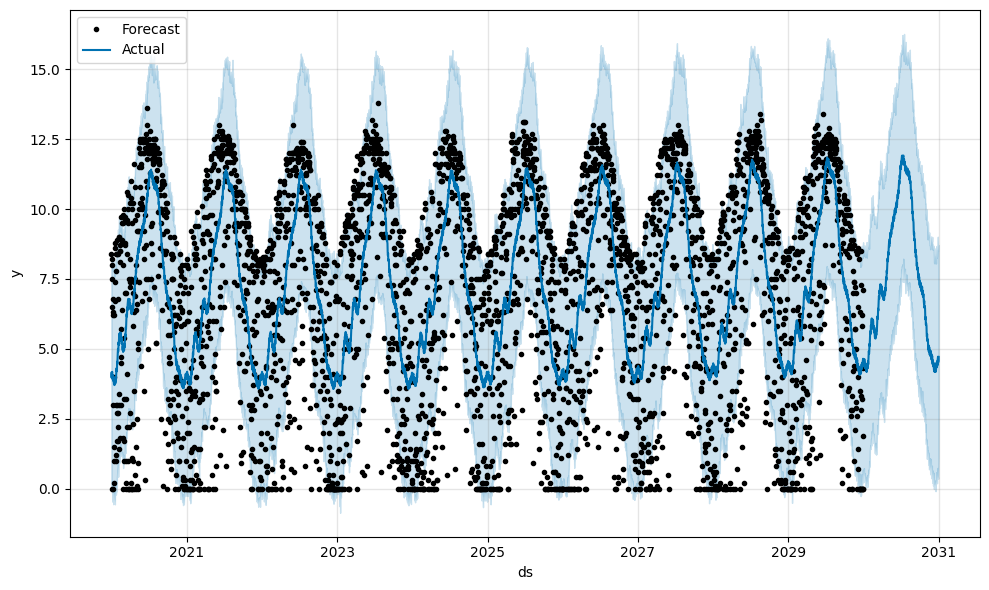

In [31]:
# Plot the forecast
fig = prophet_model.plot(forecast)
ax = fig.gca()
ax.legend(['Forecast', 'Actual'], loc='upper left')
# Realistic Range Check:
print("Realistic Range Check:")
print("Very low values (0.003-1 hours): Likely cloudy/rainy days")
print("Medium values (4-8 hours): Partly cloudy days")
print("High values (10-12+ hours): Clear, sunny days")

## EXPLANATION TO THE ABOVE PLOT

This is a **Prophet time series forecast plot** for ROMA sunshine hours. Here's what the visualization shows:

## **Plot Components:**

### **Black Dots (Actual Data):**
- Historical sunshine data from 2020-2030
- Shows daily sunshine measurements ranging from 0-15 hours
- Clear seasonal patterns with peaks in summer months

### **Blue Line (Forecast):**
- Prophet model's predictions
- Smooth curve showing the underlying trend and seasonality
- Extends into the future (2030-2031) for forecasting

### **Light Blue Shaded Area:**
- **Confidence intervals** (uncertainty bounds)
- Shows the range where actual values are likely to fall
- Wider intervals = more uncertainty, especially in future predictions

## **Key Observations:**

### **1. Strong Seasonality:**
- **Summer peaks:** ~10-12 hours of sunshine
- **Winter valleys:** ~2-4 hours of sunshine
- Consistent yearly cycles over the 10+ year period

### **2. Model Performance:**
- Blue forecast line follows the seasonal pattern well
- Captures both the annual cycle and overall trend
- Good fit to historical data points

### **3. Future Predictions (2030-2031):**
- Model projects similar seasonal patterns to continue
- Confidence intervals widen for future dates (normal behavior)
- Maintains realistic sunshine hour ranges

## **Business Interpretation:**

**This forecast is valuable for:**

### **☀️ Solar Energy Planning:**
- Plan solar panel maintenance during low-sunshine winter months
- Optimize energy storage for seasonal variations
- Forecast energy production capacity

### **🌾 Agricultural Planning:**
- Crop planting schedules based on expected sunshine
- Irrigation planning for different seasons
- Greenhouse management optimization

### **🏖️ Tourism & Recreation:**
- Seasonal tourism marketing strategies
- Event planning around high-sunshine periods
- Hotel pricing optimization

## **Model Quality Assessment:**
The Prophet model appears to perform well, capturing:
- ✅ Strong seasonal patterns
- ✅ Realistic value ranges (0-15 hours)
- ✅ Appropriate uncertainty quantification
- ✅ Stable long-term forecasting

**The regular, predictable patterns make this an ideal use case for Prophet's time series forecasting capabilities.**